In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import random
import sys

from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

sys.path.append('lib/')
from NumericPCA import NumericPCA

In [13]:
n = 50 # number of rows in test matrix
m = 10 # number of columns in test matrix

trials = 10 # number of trials
n_components = [2,4,6,8]


In [14]:
# function to calc error
def getReconstructionError(ogData,newData):
    rmse = np.sqrt(mean_squared_error(ogData, newData))
    nrmse = rmse/np.sqrt(np.mean(ogData**2))
    # diff = np.abs(ogData - newData)
    return(nrmse)

In [15]:
results = pd.DataFrame(columns=['trial','n_components','method','nrmse'])

for t in range(trials):
    X = np.random.randint(10,size=(n,m))
    
    for p in n_components:
        ignore_run = False
        nPCA = NumericPCA(n_components=p)
        fit = nPCA.fit(X)
        X_trans = nPCA.transform(X)
        X_new = nPCA.inverse_transform(X_trans)
        if np.any(np.isnan(X_new)): ignore_run = True
        # print(X_new)
        if not ignore_run: nPCA_error = getReconstructionError(X,X_new)
        
        
        pca = PCA(n_components=p)
        fit = pca.fit(X)
        X_trans = pca.transform(X)
        X_new = pca.inverse_transform(X_trans)
        if np.any(np.isnan(X_new)): ignore_run = True
        # print(X_new)
        if not ignore_run: pca_error = getReconstructionError(X,X_new)
        
        # print(ignore_run)
        if not ignore_run:
            r = [{'trial': t,'n_components': p,'method': 'project','nrmse': nPCA_error,},
                {'trial': t,'n_components': p,'method': 'pca','nrmse': pca_error,}]
            results = results.append(r, True)
            
            # print(results.head())

/Users/annastephens/Source/public-cmse823/spikes/lib/NumericPCA.py:225: RuntimeWarning: divide by zero encountered in double_scalars
  x[i] = (y[i]-c)/U[i,i]
/Users/annastephens/Source/public-cmse823/spikes/lib/NumericPCA.py:224: RuntimeWarning: invalid value encountered in double_scalars
  c+=U[i,j]*x[j]
/Users/annastephens/Source/public-cmse823/spikes/lib/NumericPCA.py:225: RuntimeWarning: divide by zero encountered in double_scalars
  x[i] = (y[i]-c)/U[i,i]
/Users/annastephens/Source/public-cmse823/spikes/lib/NumericPCA.py:224: RuntimeWarning: invalid value encountered in double_scalars
  c+=U[i,j]*x[j]
/Users/annastephens/Source/public-cmse823/spikes/lib/NumericPCA.py:225: RuntimeWarning: divide by zero encountered in double_scalars
  x[i] = (y[i]-c)/U[i,i]
/Users/annastephens/Source/public-cmse823/spikes/lib/NumericPCA.py:224: RuntimeWarning: invalid value encountered in double_scalars
  c+=U[i,j]*x[j]
/Users/annastephens/Source/public-cmse823/spikes/lib/NumericPCA.py:225: Runtime

In [16]:
results.head()

,trial,n_components,method,nrmse
0,0,2,project,0.439172
1,0,2,pca,0.421143
2,0,4,project,0.387188
3,0,4,pca,0.328349
4,0,6,project,0.349189


In [19]:
summary = results.groupby(['n_components','method']).agg({'nrmse': ['mean', 'std'],})
summary.reset_index()

n_components   method     nrmse          
                             mean       std
0            2      pca  0.432095  0.008532
1            2  project  0.446625  0.031612
2            4      pca  0.340377  0.008684
3            4  project  0.390495  0.060870
4            6      pca  0.255531  0.008928
5            6  project  0.344818  0.088204
6            8      pca  0.160330  0.010012
7            8  project  0.327279  0.109039

<AxesSubplot:xlabel='n_components', ylabel='nrmse'>

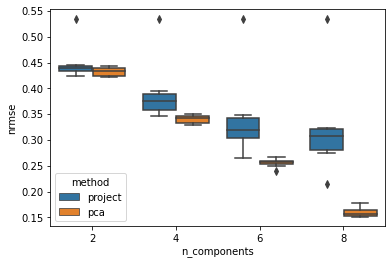

In [18]:
# import seaborn as sns

sns.boxplot(y='nrmse', x='n_components', 
                 data=results, 
                 hue='method')

# swarm_plot = sns.swarmplot(...)
# fig = swarm_plot.get_figure()
# fig.savefig("out.png")